# Some package will need to install 

In [1]:
# import matplotlib.finance package to get the finance data from yahoo 
# %pip install yfinance
# %pip install pandas_datareader

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import matplotlib.mlab as mlab
import pandas
import pandas_datareader as web
import datetime
import matplotlib.ticker as ticker

In [9]:

# load the constituent of the csi300, and get their constituent code
csi300 = pandas.read_excel("./Data/CSI_300_list.xls")
drop_columns = ['日期Date', '指数代码Index Code', '指数名称Index Name', '指数英文名称Index Name(Eng.)', '权重(%)Weight(%)']
csi_code_name = csi300.drop(drop_columns,axis=1)

Constituent_Code = []
for i in csi_code_name['成分券代码Constituent Code']:
    Constituent_Code.append( str("%06d" % i))

Exchange = []
for i in csi_code_name['交易所Exchange']:
    if i == 'SHH':
        Exchange.append('.SS')
    elif i =='SHZ':
        Exchange.append('.SZ')

cis_zip= zip(Constituent_Code,Exchange)
list_csi300 = []
for i in cis_zip:
    list_csi300.append(i[0]+i[1])
list_csi300
# list_csi300

# load the constituent of the sp500, and get their constituent symbol
sp500 = pandas.read_csv("./Data/sp500.csv")
sp500 = sp500.drop('Sector',axis = 1)
list_sp500 = list(sp500['Symbol'])
# list_sp500
erro_list = ['APC','BHGE', 'BBT', 'BRK.B', 'BF.B', 'DWDP', 'DPS', 'GGP', 'HRS', 'HCP', 'LLL', 'LUK', 'KORS', 'RHT', 'SYMC', 'TMK', 'TSS', 'WYN']

for i in erro_list:
    list_sp500.remove(i)
    
list_all = list_csi300+list_sp500
list_all

['600000.SS',
 '600004.SS',
 '600009.SS',
 '600010.SS',
 '600011.SS',
 '600015.SS',
 '600016.SS',
 '600018.SS',
 '600019.SS',
 '600023.SS',
 '600025.SS',
 '600027.SS',
 '600028.SS',
 '600029.SS',
 '600030.SS',
 '600031.SS',
 '600036.SS',
 '600038.SS',
 '600048.SS',
 '600050.SS',
 '600061.SS',
 '600066.SS',
 '600068.SS',
 '600085.SS',
 '600089.SS',
 '600100.SS',
 '600104.SS',
 '600109.SS',
 '600111.SS',
 '600115.SS',
 '600118.SS',
 '600153.SS',
 '600170.SS',
 '600176.SS',
 '600177.SS',
 '600183.SS',
 '600188.SS',
 '600196.SS',
 '600208.SS',
 '600219.SS',
 '600221.SS',
 '600233.SS',
 '600271.SS',
 '600276.SS',
 '600297.SS',
 '600299.SS',
 '600309.SS',
 '600332.SS',
 '600340.SS',
 '600346.SS',
 '600352.SS',
 '600362.SS',
 '600369.SS',
 '600372.SS',
 '600383.SS',
 '600390.SS',
 '600398.SS',
 '600406.SS',
 '600436.SS',
 '600438.SS',
 '600482.SS',
 '600487.SS',
 '600489.SS',
 '600498.SS',
 '600516.SS',
 '600519.SS',
 '600522.SS',
 '600535.SS',
 '600547.SS',
 '600566.SS',
 '600570.SS',
 '6005

In [10]:
def get_stock_data(stock_symbol,start_date,end_date, plot = False, return_data  = False):
    start_year = start_date[0]
    start_month =start_date[1]
    start_day = start_date[2]
    
    end_year = end_date[0]
    end_month = end_date[1]
    end_day= end_date[2]
    
    start = datetime.datetime(start_year, start_month, start_day)
    end = datetime.datetime(end_year,end_month, end_day)
    start = str(start)[:10]
    end = str(end)[:10]
    
    
    try:
        try:
            data_file_name = './Data/Stock_Data/'+stock_symbol+'.csv'
            stock_history_data = pandas.read_csv(data_file_name)
            stock_history_data= stock_history_data.set_index('Date')
            stock_history_data = stock_history_data.loc[start:end]
            
        except:
            web.DataReader(stock_symbol,'yahoo',
                           datetime.datetime(2000, 1, 1),  
                           datetime.datetime(2020, 4, 1)).to_csv(data_file_name)
            stock_history_data = pandas.read_csv(data_file_name)    
            stock_history_data= stock_history_data.set_index('Date')
            stock_history_data = stock_history_data.loc[start:end]
            
        if plot == True: 
            try:
                close_price_column = stock_history_data['Close']
                close_price_column.plot()
            except:
                print("There is something wrong when plotting the close price.")

       
        if return_data == True:
            return stock_history_data
        
    except:
        erro_list.append(stock_symbol)
        print("Stock Name Error!!! Please check you entered stock name.")

start_date = (2014,4,1)
end_dated = (2020,4,1)

xing_ye_bank = get_stock_data('601166.SS',start_date,end_dated,return_data= True)
xing_ye_bank

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-04-01,9.450000,9.280000,9.340000,9.380000,111118616.0,7.435421
2014-04-02,9.570000,9.340000,9.380000,9.490000,83313596.0,7.522617
2014-04-03,9.580000,9.320000,9.550000,9.380000,80428477.0,7.435421
2014-04-04,9.590000,9.300000,9.310000,9.580000,89127260.0,7.593960
2014-04-08,10.500000,9.660000,9.660000,10.350000,436417241.0,8.204330
...,...,...,...,...,...,...
2020-03-26,16.580000,15.720000,15.800000,16.190001,117356964.0,16.190001
2020-03-27,16.480000,16.209999,16.400000,16.280001,58406233.0,16.280001
2020-03-30,16.230000,16.000000,16.080000,16.200001,54214981.0,16.200001


In [5]:
# Download all constituent historical data from (2015,1,1) to (2020,4,1)

for i in list_all:
    start_date = (2015,1,1)
    end_date = (2020,4,1)
    get_stock_data(i,start_date,end_date,plot=False ,return_data= False)
    print(i)

600000.SS
600004.SS
600009.SS
600010.SS
600011.SS
600015.SS
600016.SS
600018.SS
600019.SS
600023.SS
600025.SS
600027.SS
600028.SS
600029.SS
600030.SS
600031.SS
600036.SS
600038.SS
600048.SS
600050.SS
600061.SS
600066.SS
600068.SS
600085.SS
600089.SS
600100.SS
600104.SS
600109.SS
600111.SS
600115.SS
600118.SS
600153.SS
600170.SS
600176.SS
600177.SS
600183.SS
600188.SS
600196.SS
600208.SS
600219.SS
600221.SS
600233.SS
600271.SS
600276.SS
600297.SS
600299.SS
600309.SS
600332.SS
600340.SS
600346.SS
600352.SS
600362.SS
600369.SS
600372.SS
600383.SS
600390.SS
600398.SS
600406.SS
600436.SS
600438.SS
600482.SS
600487.SS
600489.SS
600498.SS
600516.SS
600519.SS
600522.SS
600535.SS
600547.SS
600566.SS
600570.SS
600583.SS
600585.SS
600588.SS
600606.SS
600637.SS
600655.SS
600660.SS
600663.SS
600674.SS
600690.SS
600703.SS
600705.SS
600733.SS
600741.SS
600760.SS
600795.SS
600809.SS
600816.SS
600837.SS
600848.SS
600867.SS
600886.SS
600887.SS
600893.SS
600900.SS
600919.SS
600926.SS
600928.SS
600958.SS


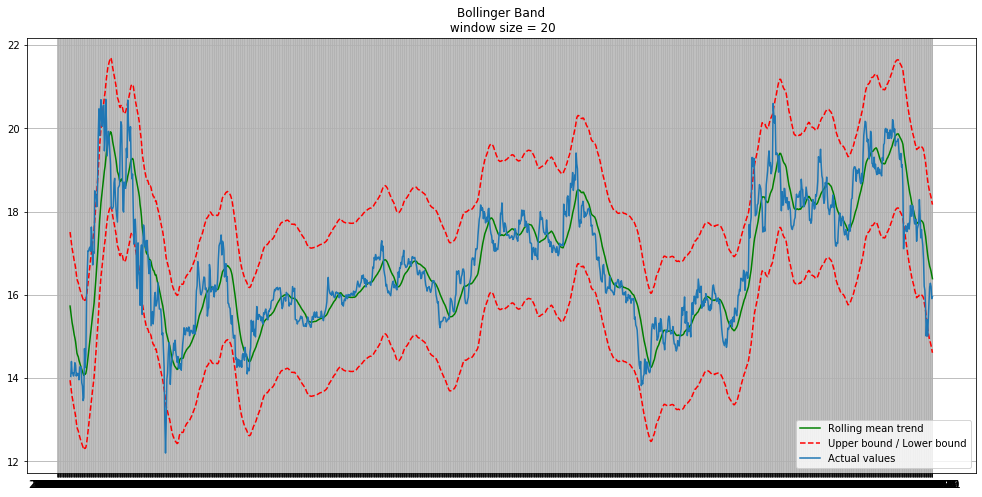

In [11]:
# Ploting the bollinger channel

from sklearn.metrics import mean_absolute_error

def plot_bollinger_bands(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Bollinger Band\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
start_date = (2015,1,1)
end_date = (2020,4,1)
xing_ye_bank = get_stock_data('601166.SS',start_date,end_date,return_data= True)
xing_ye_bank_close = xing_ye_bank['Close']
plot_bollinger_bands( xing_ye_bank_close,20,plot_intervals=True)

Formula for Hurst Channel：
AA:=MA((2CLOSE+HIGH+LOW)/4,5); short term channel 1 :AAN/100; short term channel 2:AA(200-N)/100; CC:=ABS((2CLOSE+HIGH+LOW)/4-MA(CLOSE,20))/MA(CLOSE,20); DD:=DMA(CLOSE,CC);

long term channel 3:(1+M/100)DD; long term channel 4:(1-M/100)DD; parameter ：n:102 ; m:7

,short_upper,short_lower,long_upper,long_lower,Close
Date,,,,,
2015-04-21,20.51322,19.70878,20.596534,17.901660,19.750000
2015-04-22,20.58768,19.78032,20.691576,17.984267,20.700001
2015-04-23,20.58054,19.77346,20.730483,18.018083,20.150000
2015-04-24,20.29902,19.50298,20.730125,18.017772,19.340000
2015-04-27,20.25822,19.46378,20.731302,18.018795,19.629999
...,...,...,...,...,...
2020-03-26,15.86457,15.24243,17.872288,15.533857,16.190001
2020-03-27,16.05735,15.42765,17.863538,15.526253,16.280001
2020-03-30,16.28379,15.64521,17.850527,15.514944,16.200001


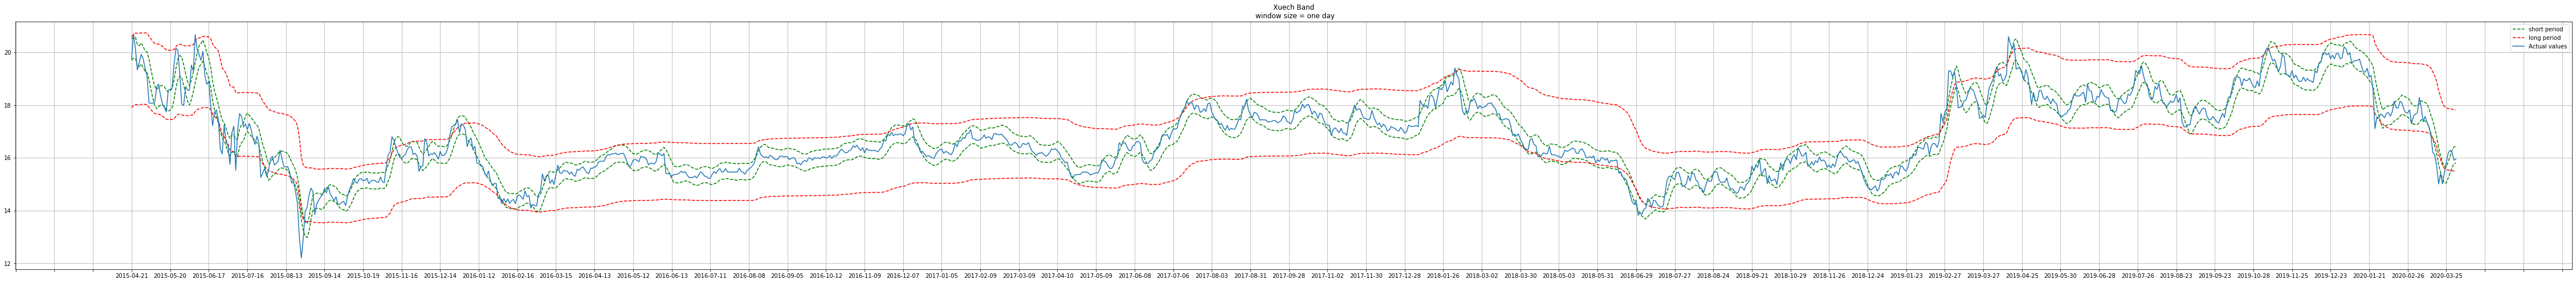

In [72]:
# plot_hurst_band
def plot_hurst_band(stock_df,plot_hurst = True):

    def get_4_lines(dataframe,m = 7,n =102):
        def MA(series,window):
            rolling_mean = series.rolling(window=window).mean()
            return rolling_mean
        def DMA(close,cc):
            cc = cc.fillna(0)
            close_list = list(close)
            cc_list = list(cc)
            dma = [0]
            for i in range(len(cc_list)):
                if i>0:
                    dma.append(cc_list[i]*close_list[i]+(1-cc_list[i])*dma[i-1])
            close_df = pandas.DataFrame(close)
            close_df['dma'] = dma
            dma_series = close_df['dma']
            return dma_series

        high = dataframe['High']
        low = dataframe['Low']
        close = dataframe['Close'] 
        aa = MA((2*close+high+low)/4,5)
        cc = abs((2*close+high+low)/4-MA(close,20))/MA(close,20)
        dd = DMA(close,cc)

        line1 = aa*n/100
        line1 = line1.fillna(0)
        line2 = aa*(200-n)/100
        line2 = line2.fillna(0)
        line3 = (1+m/100)*dd
        line4 = (1-m/100)*dd

        return (line1,line2,line3,line4,close)	
    
    def get_first_intersection(lines):
        last_value = 1
        first_cross = 0

        line0 = lines[0]
        line1 = lines[1]
        line2 = lines[2]
        line3 = lines[3]
        close = lines[4]

        count = 0
        for i in (lines[0]-lines[2]):
            if i<0:
#                 print("The first intersection of longterm upper bound and shorterm upper bound is:")
#                 print(count)
                break        
            else:
                count += 1

        return count

    def return_hurst_band_df(lines,first_intersect):
        #   截去前端
        long_term_upper_bound = lines[2][first_intersect:]
        long_term_lower_bound = lines[3][first_intersect:]
        short_term_upper_bound = lines[0][first_intersect:]
        short_term_lower_bound = lines[1][first_intersect:]
        close_price = lines[4][first_intersect:]
        #   转为dataframe
        long_term_upper_bound_df = pandas.DataFrame(long_term_upper_bound)
        long_term_lower_bound_df = pandas.DataFrame(long_term_lower_bound)
        short_term_upper_bound_df = pandas.DataFrame(short_term_upper_bound)
        short_term_lower_bound_df = pandas.DataFrame(short_term_lower_bound)
        close_price_df = pandas.DataFrame(close_price)
        #   改名，合并alllines
        df_long_lower = long_term_lower_bound_df.rename(columns={'dma':'long_lower'})
        df_long_upper = long_term_upper_bound_df.rename(columns={'dma':'long_upper'})
        long_term_bound = df_long_upper.join(df_long_lower)
        df_short_upper = short_term_upper_bound_df.rename(columns={0:'short_upper'}) 
        df_short_lower = short_term_lower_bound_df.rename(columns={0:'short_lower'})
        shor_term_bound = df_short_upper.join(df_short_lower)
        all_lines = shor_term_bound.join(long_term_bound).join(close_price_df)
        return all_lines

    lines = get_4_lines(stock_df)
    first_cross = get_first_intersection(lines)

    line1 = lines[0][first_cross:]
    line2 = lines[1][first_cross:]
    line3 = lines[2][first_cross:]
    line4 = lines[3][first_cross:]
    close = lines[4][first_cross:]
    
    if plot_hurst == True:
        plot_length = len(close)/15
        plot_width =  8
        plt.figure(figsize=(plot_length,plot_width))
        plt.title('Xuech Band\n window size = {}'.format("one day"))

        #Plot confidence intervals for smoothed values
        plt.plot(line1, 'g--', label='short period')
        plt.plot(line2, 'g--')
        plt.plot(line3, 'r--', label='long period')
        plt.plot(line4, 'r--')
        plt.plot(close, label='Actual values')

        ax = plt.gca()   #表明设置图片的各个轴，plt.gcf()表示图片本身
        ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

        plt.legend(loc='best')
        plt.grid(True)

    hurst_band_df = return_hurst_band_df(lines,first_cross)
    return hurst_band_df



xing_ye_hurst_df = plot_hurst_band(xing_ye_bank,plot_hurst= True)
xing_ye_hurst_df


In [13]:
def implement_strategy_and_return_buy_sell_df(all_lines):
    yesterday = 0
    holding_stock = False
    buy_point_list = []
    sell_point_list = []

    for i in all_lines.iterrows():
        today = i
        if yesterday == 0:
            yesterday = today
        else:
            today_date = i[0]
            today_data = i[1]
            today_short_upper = today_data['short_upper']
            today_short_lower = today_data['short_lower']
            today_long_upper = today_data['long_upper']
            today_long_lower = today_data['long_lower']
            today_Close = today_data['Close']

            yesterday_date = yesterday[0]
            yesterday_data = yesterday[1]
            yesterday_short_upper = yesterday_data['short_upper']
            yesterday_short_lower = yesterday_data['short_lower']
            yesterday_long_upper = yesterday_data['long_upper']
            yesterday_long_lower = yesterday_data['long_lower']
            yesterday_Close = yesterday_data['Close']


            if yesterday_Close < yesterday_long_lower and today_Close>today_long_lower and holding_stock == False:
    #             print("出现买入点")  
                buy_point = pandas.Series({'buy_date':today_date,'buy_price':today_Close})
                buy_point_list.append(buy_point)
                holding_stock = True

            elif yesterday_Close> yesterday_long_lower and today_Close<today_long_lower and holding_stock == True:

    #             print("出现卖出点")
                sell_point = pandas.Series({'sell_date':today_date,'sell_price':today_Close})
                sell_point_list.append(sell_point)
                holding_stock = False

            elif yesterday_Close>yesterday_long_upper and today_Close<today_long_upper and holding_stock == True:
    #             print("出现卖出点")
                sell_point = pandas.Series({'sell_date':today_date,'sell_price':today_Close})
                sell_point_list.append(sell_point)
                holding_stock = False
            yesterday = today

    buy_sell_df = pandas.DataFrame(buy_point_list).join(pandas.DataFrame(sell_point_list))
    profit = buy_sell_df['sell_price'] - buy_sell_df['buy_price']   
    profit = profit.rename('profit')
    buy_sell_df = buy_sell_df.join(profit)
    return buy_sell_df

xing_ye_buy_sell_df = implement_strategy_and_return_buy_sell_df(xing_ye_hurst_df)
xing_ye_buy_sell_df

,buy_date,buy_price,sell_date,sell_price,profit
0,2015-06-23,17.730000,2015-06-26,16.330000,-1.400000
1,2015-06-30,17.250000,2015-07-01,16.600000,-0.650000
2,2015-07-06,16.950001,2015-07-08,15.530000,-1.420001
3,2015-07-09,17.080000,2015-07-27,15.260000,-1.820000
4,2015-07-31,15.520000,2015-08-18,15.040000,-0.480000
5,2015-08-27,13.970000,2015-11-12,16.209999,2.239999
6,2016-01-27,14.490000,2016-01-28,14.260000,-0.230000
7,2016-01-29,14.460000,2016-12-13,17.059999,2.599999
8,2018-04-18,16.110001,2018-06-15,15.420000,-0.690001
9,2018-07-09,14.460000,2018-07-11,14.100000,-0.360000


In [14]:
def get_growth_in_special_period(stock_symbol,start_date,end_date):
    stock_data = get_stock_data(stock_symbol,start_date,end_date,return_data=True)
    close_data = stock_data['Close']
    start_close = stock_data['Close'][0]
    end_close = stock_data['Close'][len(stock_data)-1]
    profit = (end_close - start_close)/start_close
    rate_of_increase = round(profit*100,2)
    return rate_of_increase

# Get the growth of a single stock at a specific time
start_date = (2015,1,1)
end_date= (2020,4,1)
growth = get_growth_in_special_period('601166.SS',start_date,end_date)
growth 

-5.39

In [16]:
def get_growth_through_strategy(stock_symbol,start_date,end_date):
    month = start_date[1]
    year = start_date[0]
    if month <= 6:
        year -=1
        month +=6
        start_date = (year,month,start_date[2])
    else:
        month = month-6
        start_date = (start_date[0],month,start_date[2])
#     print('start date')
#     print(start_date)
    stock_data = get_stock_data(stock_symbol,start_date,end_date,return_data= True)
    hurst_bands_data = plot_hurst_band(stock_data,plot_hurst = False)
    buy_sell_df = implement_strategy_and_return_buy_sell_df(hurst_bands_data)
#     print(buy_sell_df)
    profit_list = buy_sell_df['profit'].fillna(0)
    total_profit = sum(profit_list)
    start_price = stock_data['Close'][0]
    rate_of_increase =round(total_profit/start_price*100,2)
    
    return rate_of_increase

# Proportion of profits obtained through the hurst channel strategy at the same time
start_date = (2015,1,1)
end_date= (2020,4,1)
growth = get_growth_through_strategy('601166.SS',start_date,end_date)
growth 

40.76

In [20]:
csi300_result_list =[]
for i in list_csi300:
    start_date = (2016,1,1)
    end_date = (2020,4,1)
    growth = get_growth_in_special_period(i,start_date,end_date)
    strategy_profit_growth_percentage = get_growth_through_strategy(i,start_date,end_date)
    
    one_stock_result = pandas.Series({'stock symbol':i,'start date':start_date,'end date':end_date,
                               'growth':growth,
                               'strategy_profit_growth_percentage':strategy_profit_growth_percentage})
    csi300_result_list.append(one_stock_result)
    
csi300_result_df = pandas.DataFrame(csi300_result_list)
csi300_result_df.to_csv('./Data/Result/csi300_result.csv')

sp500_result_list =[]
for i in list_sp500:
    try:
        start_date = (2016,1,1)
        end_date = (2020,4,1)
        growth = get_growth_in_special_period(i,start_date,end_date)
        strategy_profit_growth_percentage = get_growth_through_strategy(i,start_date,end_date)

        one_stock_result = pandas.Series({'stock symbol':i,'start date':start_date,'end date':end_date,
                                   'growth':growth,
                                   'strategy_profit_growth_percentage':strategy_profit_growth_percentage})
        sp500_result_list.append(one_stock_result)
    except Exception as e:
        print(i)
        
sp500_result_list_df = pandas.DataFrame(sp500_result_list)
sp500_result_list_df.to_csv('./Data/Result/sp500_result.csv')


In [22]:
csi300_result_df

,stock symbol,start date,end date,growth,strategy_profit_growth_percentage
0,600000.SS,"(2016, 1, 1)","(2020, 4, 1)",-18.94,14.86
1,600004.SS,"(2016, 1, 1)","(2020, 4, 1)",38.44,-61.54
2,600009.SS,"(2016, 1, 1)","(2020, 4, 1)",118.11,-21.22
3,600010.SS,"(2016, 1, 1)","(2020, 4, 1)",-51.04,-46.13
4,600011.SS,"(2016, 1, 1)","(2020, 4, 1)",-45.75,-2.93
...,...,...,...,...,...
295,300347.SZ,"(2016, 1, 1)","(2020, 4, 1)",249.32,24.00
296,300408.SZ,"(2016, 1, 1)","(2020, 4, 1)",4.20,6.37
297,300413.SZ,"(2016, 1, 1)","(2020, 4, 1)",98.67,-15.04
298,300433.SZ,"(2016, 1, 1)","(2020, 4, 1)",10.37,-15.16


In [23]:
sp500_result_list_df

,stock symbol,start date,end date,growth,strategy_profit_growth_percentage
0,MMM,"(2016, 1, 1)","(2020, 4, 1)",-9.32,-84.11
1,AOS,"(2016, 1, 1)","(2020, 4, 1)",-5.27,10.86
2,ABT,"(2016, 1, 1)","(2020, 4, 1)",78.36,-20.36
3,ABBV,"(2016, 1, 1)","(2020, 4, 1)",27.44,3.24
4,ACN,"(2016, 1, 1)","(2020, 4, 1)",51.90,-41.63
...,...,...,...,...,...
479,XYL,"(2016, 1, 1)","(2020, 4, 1)",65.66,-14.83
480,YUM,"(2016, 1, 1)","(2020, 4, 1)",30.32,-22.76
481,ZBH,"(2016, 1, 1)","(2020, 4, 1)",-11.96,11.05
482,ZION,"(2016, 1, 1)","(2020, 4, 1)",-5.20,7.04


In [51]:
# plot
plt.figure(figsize=(20,8))
plt.plot(csi300_result_df['growth'],label  = 'growth')
plt.plot(csi300_result_df['strategy_profit_growth_percentage'],label  = 'strategy')
plt.title('csi300_result')
plt.legend(loc='best')
plt.grid(True)

plt.figure(figsize=(20,8))
plt.plot(sp500_result_list_df['growth'],label  = 'growth')
plt.plot(sp500_result_list_df['strategy_profit_growth_percentage'],label  = 'strategy')
plt.title('sp500_result')
plt.legend(loc='best')
plt.grid(True)

In [53]:
csi300_result = pandas.read_csv('./Data/Result/csi300_result.csv')
sp500_result = pandas.read_csv('./Data/Result/sp500_result.csv')

result = csi300_result.append(sp500_result)
growth = np.array(result["growth"], dtype=float)
strategy_profit_growth_percentage = np.array(result["strategy_profit_growth_percentage"], dtype=float)


sp500_result_growth = np.array(sp500_result["growth"], dtype=float)
sp500_result_strategy= np.array(sp500_result["strategy_profit_growth_percentage"], dtype=float)

csi300_result_growth = np.array(sci300_result["growth"], dtype=float)
csi300_result_strategy = np.array(sci300_result["strategy_profit_growth_percentage"], dtype=float)

print("The mean of natural growth percentage of constituent of sp500 is:")
print(sp500_result_growth.mean())
print("The mean of strategy profit percentage of constituent of sp500 is:")
print(sp500_result_strategy.mean())

print("The mean of natural growth percentage of constituent of csi300 is:")
print(csi300_result_growth.mean())
print("The mean of strategy profit percentage of constituent of csi300 is:")
print(csi300_result_strategy.mean())


The mean of natural growth percentage of constituent of sp500 is:
16.406301652892566
The mean of strategy profit percentage of constituent of sp500 is:
1074.675020661157
The mean of natural growth percentage of constituent of csi300 is:
48.2796
The mean of strategy profit percentage of constituent of csi300 is:
1.8351000000000004


In [63]:
sci300_result = pandas.read_csv('./Data/Result/csi300_result.csv')
sp500_result = pandas.read_csv('./Data/Result/sp500_result.csv')

growth_sci = np.array(sci300_result["growth"], dtype=float)
strategy_profit_growth_percentage_sci = np.array(sci300_result["strategy_profit_growth_percentage"], dtype=float)
growth_sp = np.array(sp500_result["growth"], dtype=float)
strategy_profit_growth_percentage_sp = np.array(sp500_result["strategy_profit_growth_percentage"], dtype=float)

In [64]:
from scipy.stats import normaltest

def test_normal(data):
    
    """𝐻0 : The distribution is normal."""
    """𝐻1 : The distribution is not normal."""
    
    k, p = normaltest(data)
    plt.hist(data)
    plt.legend(("p-value=%.2g"%p, ))

    print ("H0 - Drug-B come from a normal distribution: ")
    if p<0.05:
        print ("Reject in favor of H1.")
    else:
        print ("Accept.")

H0 - Drug-B come from a normal distribution: 
Reject in favor of H1.


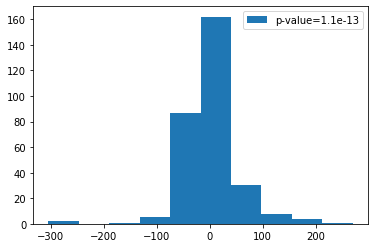

In [65]:
test_normal(strategy_profit_growth_percentage_sci)

H0 - Drug-B come from a normal distribution: 
Reject in favor of H1.


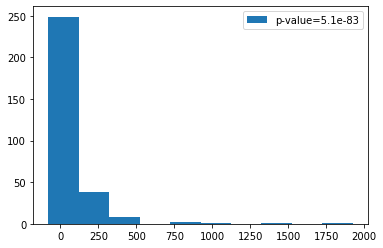

In [66]:
test_normal(growth_sci)

H0 - Drug-B come from a normal distribution: 
Reject in favor of H1.


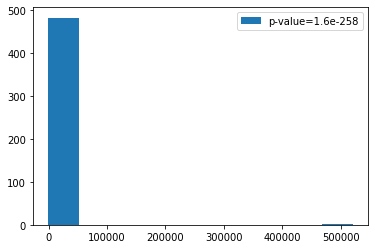

In [67]:
test_normal(strategy_profit_growth_percentage_sp)

H0 - Drug-B come from a normal distribution: 
Reject in favor of H1.


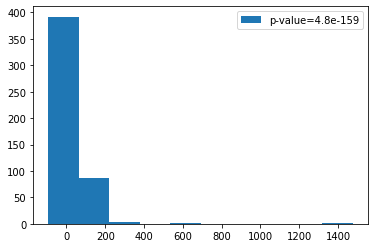

In [68]:
test_normal(growth_sp)

In [69]:
from scipy import stats

def test_all_stock_profit(data1, data2):
    
    "test whether our method worked on this stock"
    "𝐻0 : two sample come from the same distribution, the mean difference is due to chance."
    "𝐻1 : 'two sample come from different distribution, the mean different is not due to chance."
       
    mean1 = data1.mean()
    mean2 = data2.mean()
    print("Strategy mean:", mean1)
    print("Stock natural growth mean:", mean2)
    
    if mean1 <= mean2:
        print("Strategy not worked")
    else:
        # two-tailed Mann-Whitney (Not Normal)
        t_statistic, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
        if (p_value/2)<0.05:
            print ("t-statistic = ", t_statistic)
            print ("p-value = ", p_value)
            print ("halve p-value = ", p_value/2)
            print ("Reject in favor of H1. Strategy worked.")
        else:
            print ("t-statistic = ", t_statistic)
            print ("p-value = ", p_value)
            print ("halve p-value = ", p_value/2)
            print ("Accept H0, but the mean different is due to chance. ")

In [70]:
test_all_stock_profit( strategy_profit_growth_percentage_sp, growth_sp)

Strategy mean: 1074.675020661157
Stock natural growth mean: 16.406301652892566
t-statistic =  112073.0
p-value =  0.2451751408951356
halve p-value =  0.1225875704475678
Accept H0, but the mean different is due to chance. 


In [71]:
test_all_stock_profit(strategy_profit_growth_percentage_sci, growth_sci)

Strategy mean: 1.8351000000000004
Stock natural growth mean: 48.2796
Strategy not worked


,short_upper,short_lower,long_upper,long_lower,Close
Date,,,,,
2018-10-10,1165.930978,1120.208194,1184.115303,1029.184329,1081.219971
2018-10-11,1147.767022,1102.756550,1182.050395,1027.389596,1079.319946
2018-10-12,1136.967361,1092.380405,1182.332204,1027.634533,1110.079956
2018-10-15,1126.443107,1082.268868,1181.596670,1026.995236,1092.250000
2018-10-16,1121.328732,1077.355057,1182.224865,1027.541238,1121.280029
...,...,...,...,...,...
2020-03-26,1125.755933,1081.608642,1233.118961,1071.776294,1161.750000
2020-03-27,1132.073820,1087.678768,1230.411415,1069.423005,1110.709961
2020-03-30,1149.600170,1104.517811,1230.287239,1069.315077,1146.819946


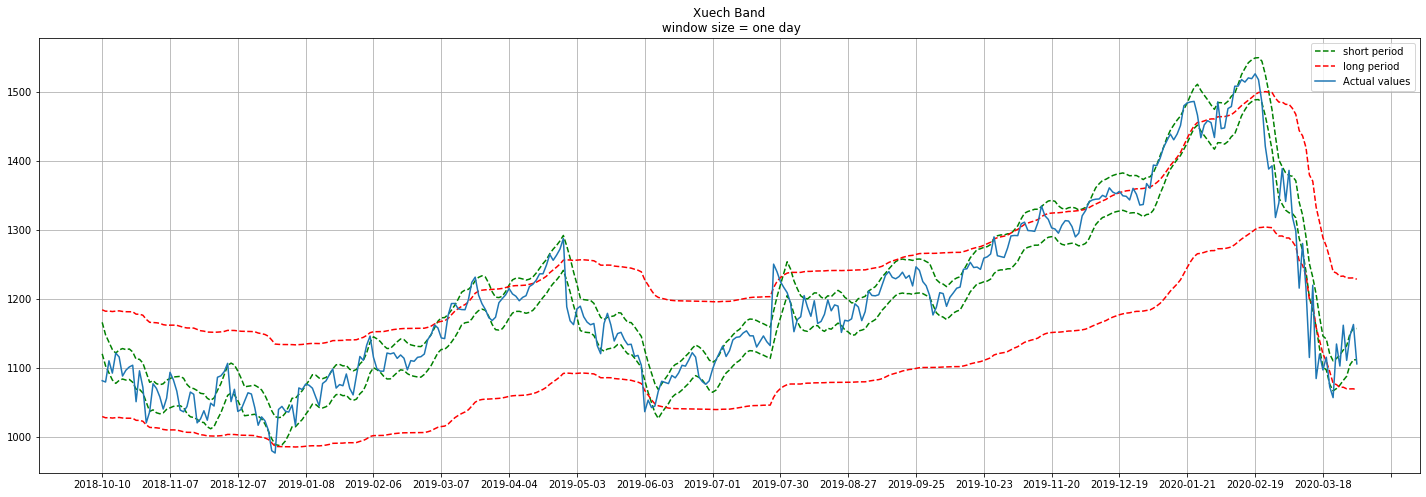

In [76]:
start_date = (2018,4,1)
end_dated = (2020,4,1)

GOOG = get_stock_data('GOOG',start_date,end_dated,return_data= True)
GOOG

GOOG_hurst_df = plot_hurst_band(xing_ye_bank,plot_hurst= True)
GOOG_hurst_df